# **`Week_1`**
## **Tasks**


*   Linear Regression Model
*   Logistic Regression Model
*   Activation Functions



# **`Linear Regression`**

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns

In [149]:
df = pd.read_csv("insurance.csv")

In [150]:
cats = [cols for cols in df.columns if df[cols].dtype == object]
nums = [cols for cols in df.columns if df[cols].dtype != object]
del nums[-1]

In [151]:
from sklearn.preprocessing import StandardScaler as SS
Ss = SS()

In [152]:
df[nums] = Ss.fit_transform(df[nums])

In [153]:
df

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,16884.92400
1,-1.509965,male,0.509621,-0.078767,no,southeast,1725.55230
2,-0.797954,male,0.383307,1.580926,no,southeast,4449.46200
3,-0.441948,male,-1.305531,-0.908614,no,northwest,21984.47061
4,-0.513149,male,-0.292556,-0.908614,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,male,0.050297,1.580926,no,northwest,10600.54830
1334,-1.509965,female,0.206139,-0.908614,no,northeast,2205.98080
1335,-1.509965,female,1.014878,-0.908614,no,southeast,1629.83350
1336,-1.296362,female,-0.797813,-0.908614,no,southwest,2007.94500


In [154]:
from sklearn.preprocessing import LabelEncoder as LE
Le = LE()

In [155]:
for cols in cats:
    df[cols] = Le.fit_transform(df[cols])

In [156]:
df

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,16884.92400
1,-1.509965,1,0.509621,-0.078767,0,2,1725.55230
2,-0.797954,1,0.383307,1.580926,0,2,4449.46200
3,-0.441948,1,-1.305531,-0.908614,0,1,21984.47061
4,-0.513149,1,-0.292556,-0.908614,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,1,10600.54830
1334,-1.509965,0,0.206139,-0.908614,0,0,2205.98080
1335,-1.509965,0,1.014878,-0.908614,0,2,1629.83350
1336,-1.296362,0,-0.797813,-0.908614,0,3,2007.94500


In [157]:
X = df.iloc[ : , : -1].to_numpy()
y = df.iloc[ : , -1].to_numpy()

In [158]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train, y_test = train_test_split(X , y , test_size = 0.25 , random_state = 123)

In [159]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, activation = "linear")
])

In [160]:
model.compile(loss="MeanSquaredError" , optimizer=tf.keras.optimizers.Adam(0.01))

In [147]:
model.fit(X_train , y_train, epochs= 250)

Epoch 1/250
43/43 [==============================] - 0s 2ms/step - loss: 23.3931
Epoch 2/250
43/43 [==============================] - 0s 1ms/step - loss: 8.8240
Epoch 3/250
43/43 [==============================] - 0s 1ms/step - loss: 5.9952
Epoch 4/250
43/43 [==============================] - 0s 1ms/step - loss: 4.9864
Epoch 5/250
43/43 [==============================] - 0s 2ms/step - loss: 4.9521
Epoch 6/250
43/43 [==============================] - 0s 1ms/step - loss: 4.5166
Epoch 7/250
43/43 [==============================] - 0s 1ms/step - loss: 4.4921
Epoch 8/250
43/43 [==============================] - 0s 1ms/step - loss: 4.0552
Epoch 9/250
43/43 [==============================] - 0s 2ms/step - loss: 3.9321
Epoch 10/250
43/43 [==============================] - 0s 2ms/step - loss: 3.7925
Epoch 11/250
43/43 [==============================] - 0s 1ms/step - loss: 3.7345
Epoch 12/250
43/43 [==============================] - 0s 2ms/step - loss: 3.9254
Epoch 13/250
43/43 [================

In [161]:
y_npred = model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [162]:
from sklearn.linear_model import LinearRegression as LR
Lr = LR()

In [163]:
Lr.fit(X_train , y_train)

LinearRegression()

In [164]:
from sklearn.metrics import mean_squared_error as MSE
y_pred = Lr.predict(X_test)

In [166]:
MSE(y_test , y_npred)

329046242.47810626

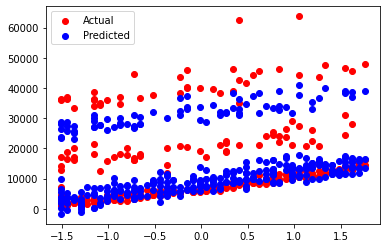

In [168]:
plt.scatter(X_test[: , 0].squeeze(),y_test,c = 'r')
plt.scatter(X_test[: , 0].squeeze(), y_pred , c = 'b')
plt.legend(["Actual", "Predicted"])

# **`Logistic Regression`**

In [134]:
from sklearn.datasets import load_digits

In [135]:
data = load_digits()

In [136]:
X = data['data']
y = data['target']

In [137]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train, y_test = train_test_split(X , y , test_size = 0.25 , random_state = 123)

In [138]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    X_train,y_train,
    epochs=20,
)

Epoch 1/20
43/43 [==============================] - 0s 2ms/step - loss: 3.2157 - sparse_categorical_accuracy: 0.4224
Epoch 2/20
43/43 [==============================] - 0s 2ms/step - loss: 0.4308 - sparse_categorical_accuracy: 0.8641
Epoch 3/20
43/43 [==============================] - 0s 2ms/step - loss: 0.2193 - sparse_categorical_accuracy: 0.9332
Epoch 4/20
43/43 [==============================] - 0s 2ms/step - loss: 0.1487 - sparse_categorical_accuracy: 0.9503
Epoch 5/20
43/43 [==============================] - 0s 2ms/step - loss: 0.1065 - sparse_categorical_accuracy: 0.9740
Epoch 6/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0844 - sparse_categorical_accuracy: 0.9755
Epoch 7/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0652 - sparse_categorical_accuracy: 0.9844
Epoch 8/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0532 - sparse_categorical_accuracy: 0.9918
Epoch 9/20
43/43 [==============================] - 0s 2ms/step 

In [139]:
y_pred = model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [141]:
model.evaluate(X_test , y_test)[1]

15/15 [==============================] - 0s 3ms/step - loss: 0.1065 - sparse_categorical_accuracy: 0.9711


0.9711111187934875

# **`Activation Functions`**

In [109]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))
def tanh(z):
    return ((np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z)))
def ReLU(z):
    return max(0, z)
def LReLU(z):
    k = 0.2
    if (z >= 0):
        return z
    else:
        return k * z 

In [170]:
print(sigmoid(1))
print(tanh(1))
print(ReLU(1))
print(LReLU(1))

0.7310585786300049
0.7615941559557649
1
1
